## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary

#### Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [3]:
data_raw = pd.read_excel('Tourism.xlsx','Tourism')

In [4]:
# Copy the data
data = data_raw.copy()

In [5]:
data.sample(n=10, random_state=43)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1026,201026,0,32.0,Self Enquiry,3,13.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,5.0,0,5,1,1.0,Manager,24204.0
4119,204119,1,30.0,Self Enquiry,3,34.0,Small Business,Female,3,4.0,Standard,3.0,Married,3.0,0,3,0,1.0,Senior Manager,26317.0
2301,202301,1,31.0,Company Invited,1,21.0,Small Business,Male,3,3.0,Basic,3.0,Married,2.0,0,4,1,0.0,Executive,17610.0
916,200916,0,46.0,Self Enquiry,3,10.0,Small Business,Female,2,4.0,King,4.0,Divorced,3.0,0,5,1,0.0,VP,33789.0
4610,204610,0,46.0,Company Invited,1,11.0,Salaried,Male,3,4.0,Deluxe,4.0,Married,3.0,0,4,1,1.0,Manager,23125.0
4587,204587,0,34.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,Basic,5.0,Unmarried,5.0,1,4,1,2.0,Executive,21477.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0
3165,203165,0,51.0,Self Enquiry,1,31.0,Salaried,Male,4,4.0,Super Deluxe,3.0,Divorced,5.0,1,4,0,1.0,AVP,32651.0
4677,204677,0,35.0,Self Enquiry,3,17.0,Salaried,Female,3,4.0,Basic,3.0,Married,3.0,1,1,0,2.0,Executive,20898.0
1504,201504,1,24.0,Self Enquiry,1,6.0,Small Business,Male,3,3.0,Basic,3.0,Married,3.0,1,3,0,2.0,Executive,17293.0


In [6]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset')

There are 4888 rows and 20 columns in the dataset


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* There are missing values in some columnns
* The columns ProdTaken, Passport, OwnCar are numeric. These must be converted to categorical columns

#### Convert some columns to categorical

In [8]:
cat_col = ['ProdTaken', 'Passport', 'OwnCar', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation', 'CityTier']
for col in cat_col:
    data[col] = data[col].astype('category')

In [9]:
for col in cat_col:
    print(data[col].value_counts())
    print("\n")

0    3968
1     920
Name: ProdTaken, dtype: int64


0    3466
1    1422
Name: Passport, dtype: int64


1    3032
0    1856
Name: OwnCar, dtype: int64


Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64


Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64


Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64


Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64


Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


1    3190
3    1500
2     198
Name: CityTier, dtype: int64




##### We can see that there are 3 categories in Gender - Male, Female and Fe Male. We need to convert 'Fe Male' to Female. 

In [10]:
# convert 'Fe Male' to 'Female' in the gender column
def to_Female(x):
    if x == 'Fe Male':
        return 'Female'
    else:
        return x

In [11]:
data['Gender'] = data['Gender'].apply(lambda x: to_Female(x))

In [12]:
data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   object  
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


In [15]:
# Remove customerId column from the data since it's just an ID and doesn't provide any value to data analysis
data.drop('CustomerID', axis=1, inplace=True)

#### Missing value Detection

In [16]:
data.isna().sum(axis=0)

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

* There are missing values in Age, TypeOfContact, DurationOfPitch, NumberOfFollowUps, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome

#### Treat Missing values

In [17]:
missing_values_num_columns = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
missing_values_cat_columns = ['TypeofContact']


In [18]:
# Treat Missing values
for col in missing_values_num_columns:
    data[col] = data[col].fillna(data[col].mean())
for col in missing_values_cat_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [19]:
data.isna().sum(axis=0)

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

#### Missing values are treated. We have replaced missing values of numeric columns with mean and categorical columns with mode.

### Visualization, Univariate and Bivariate analysis

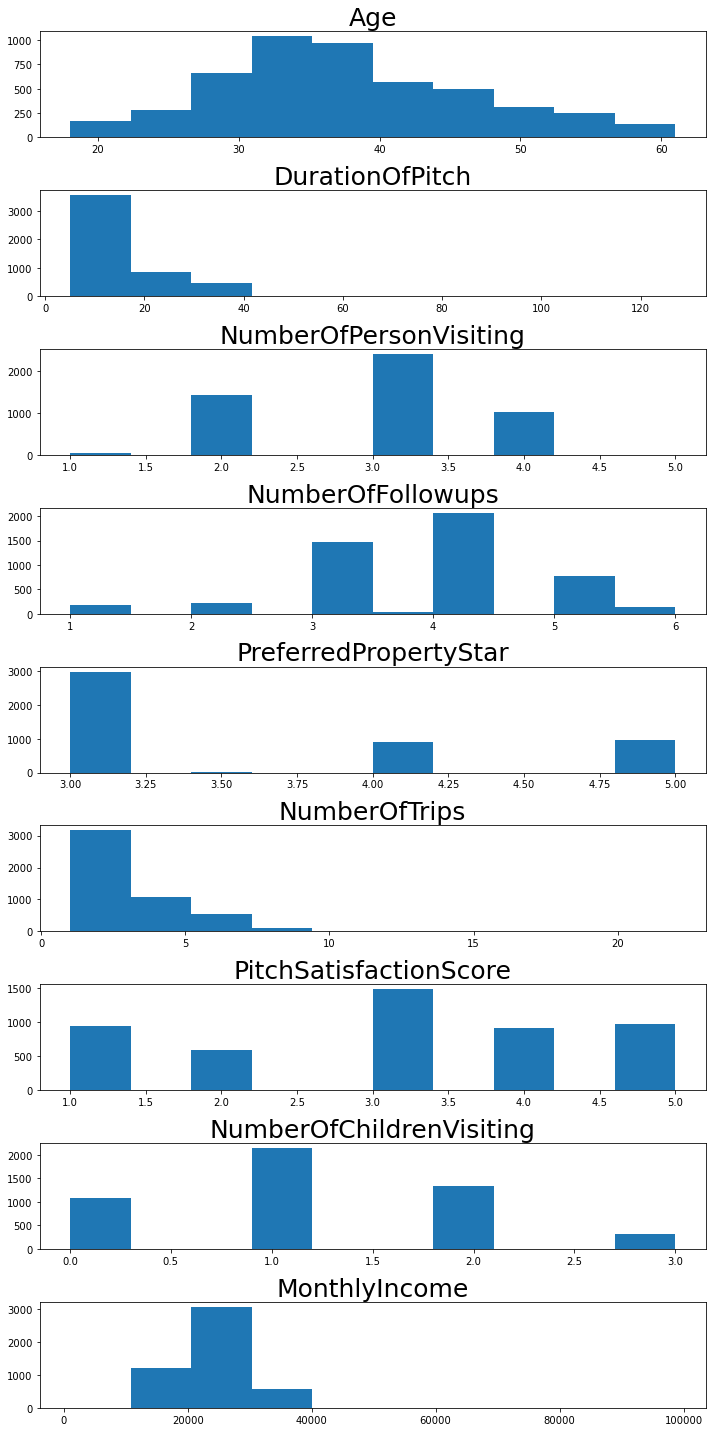

In [20]:
# Univariate analysis
numeric_col = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(10,20))
for i in range(len(numeric_col)):
    plt.subplot(len(numeric_col),1,i+1)
    plt.hist(data[numeric_col[i]])
    plt.tight_layout()
    plt.title(numeric_col[i],fontsize=25)
    
plt.show()

#### Observations:

1. Age is close to normal distribution.
2. Duration of the Pitch graph is right skewed.
3. Number of Trips is right skewed.
4. Monthly income clearly has outliers.
5. It looks like 3 is the preffered property star

In [21]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage 
    plt.show() # show the plot

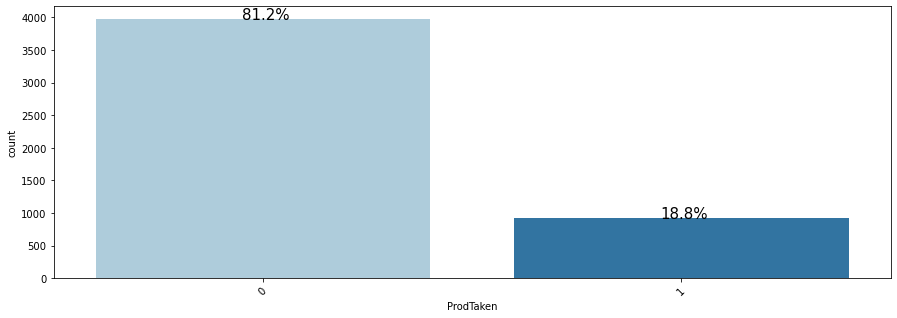

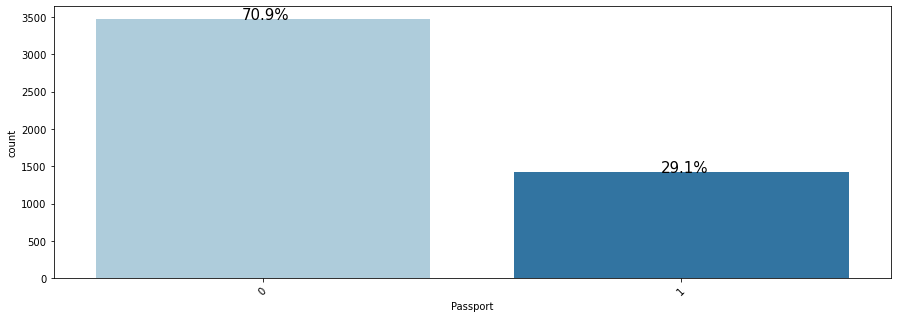

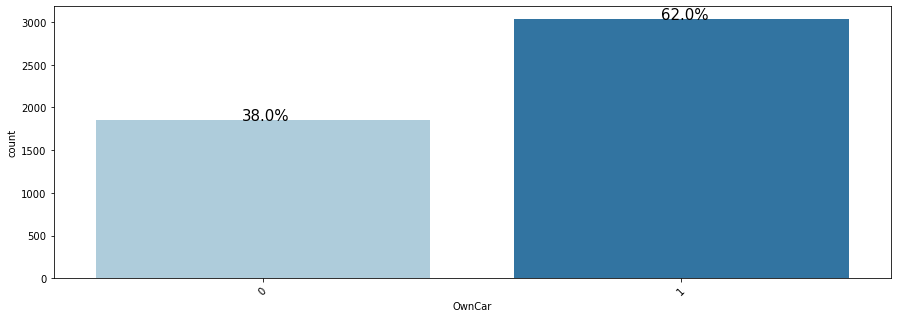

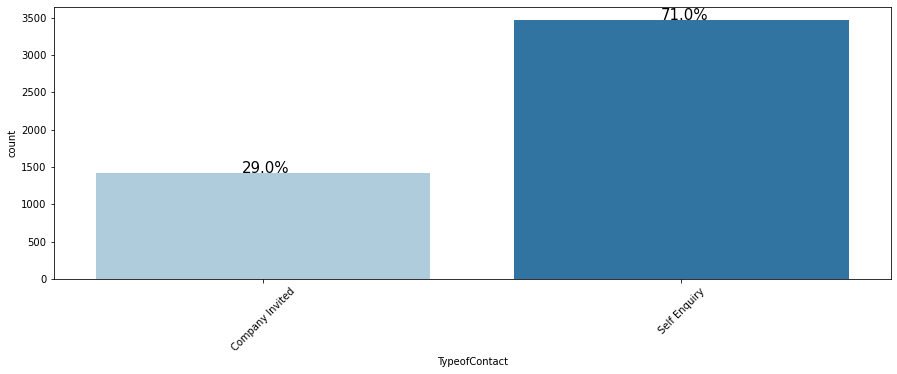

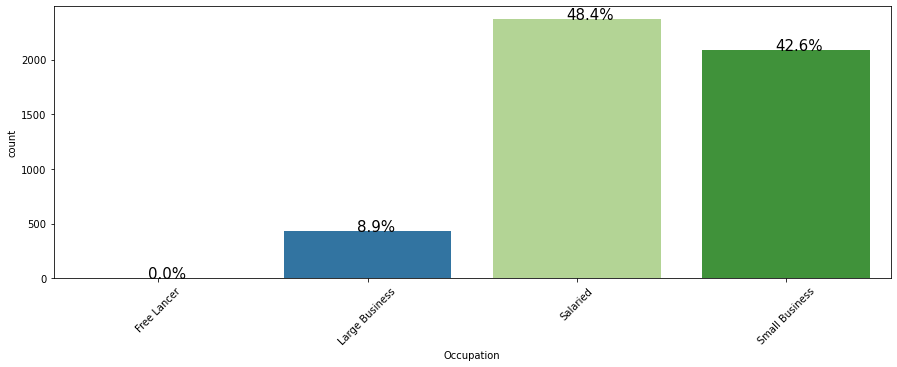

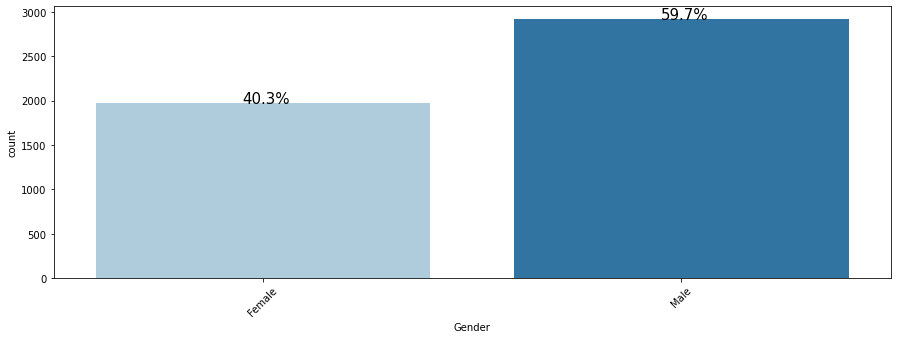

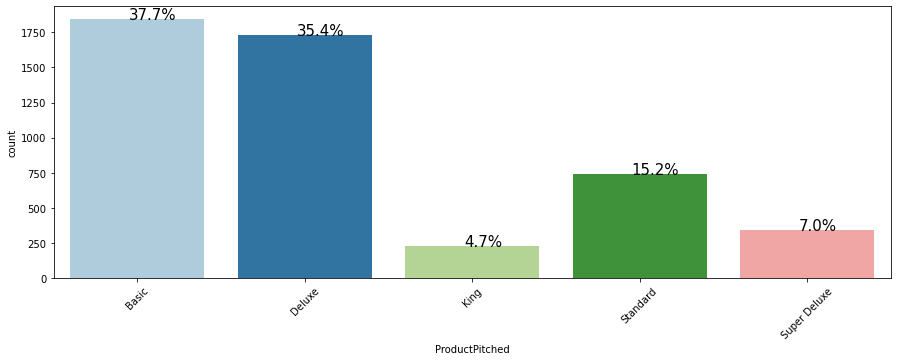

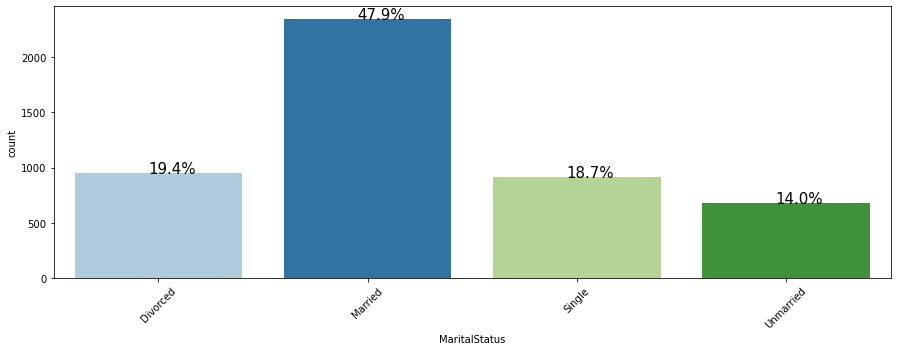

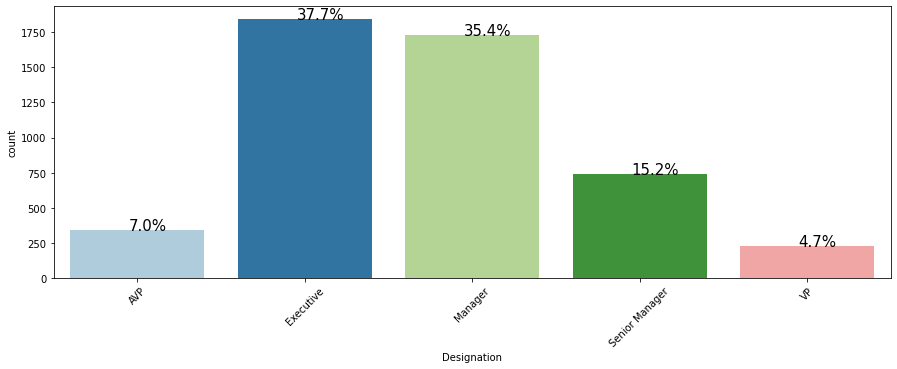

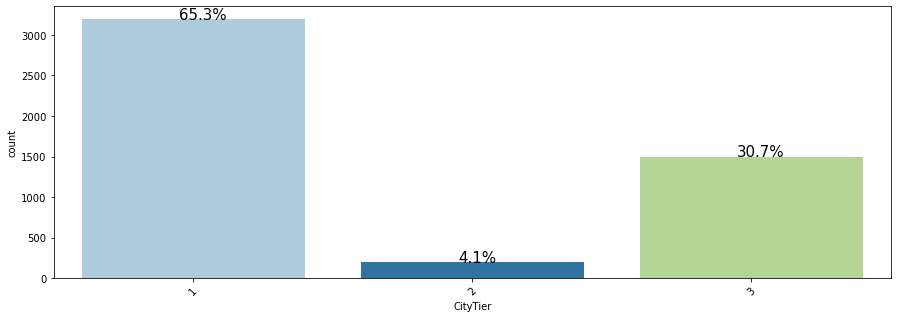

In [22]:
for col in cat_col:
    perc_on_bar(col)

__Observations__:

1. The dataset is clearly imbalanced w.r.t the target variable ProdTaken
2. There are more number of users without a passport
3. 71% of the users belong to self inquiry category
4. Basic and Deluxe packages are dominant with 37.7% and 35.4% respectively.
5. 47.9% of the users in the dataset are married
6. 65.3% of the users are from Tier 1 city

#### Bivariate analysis

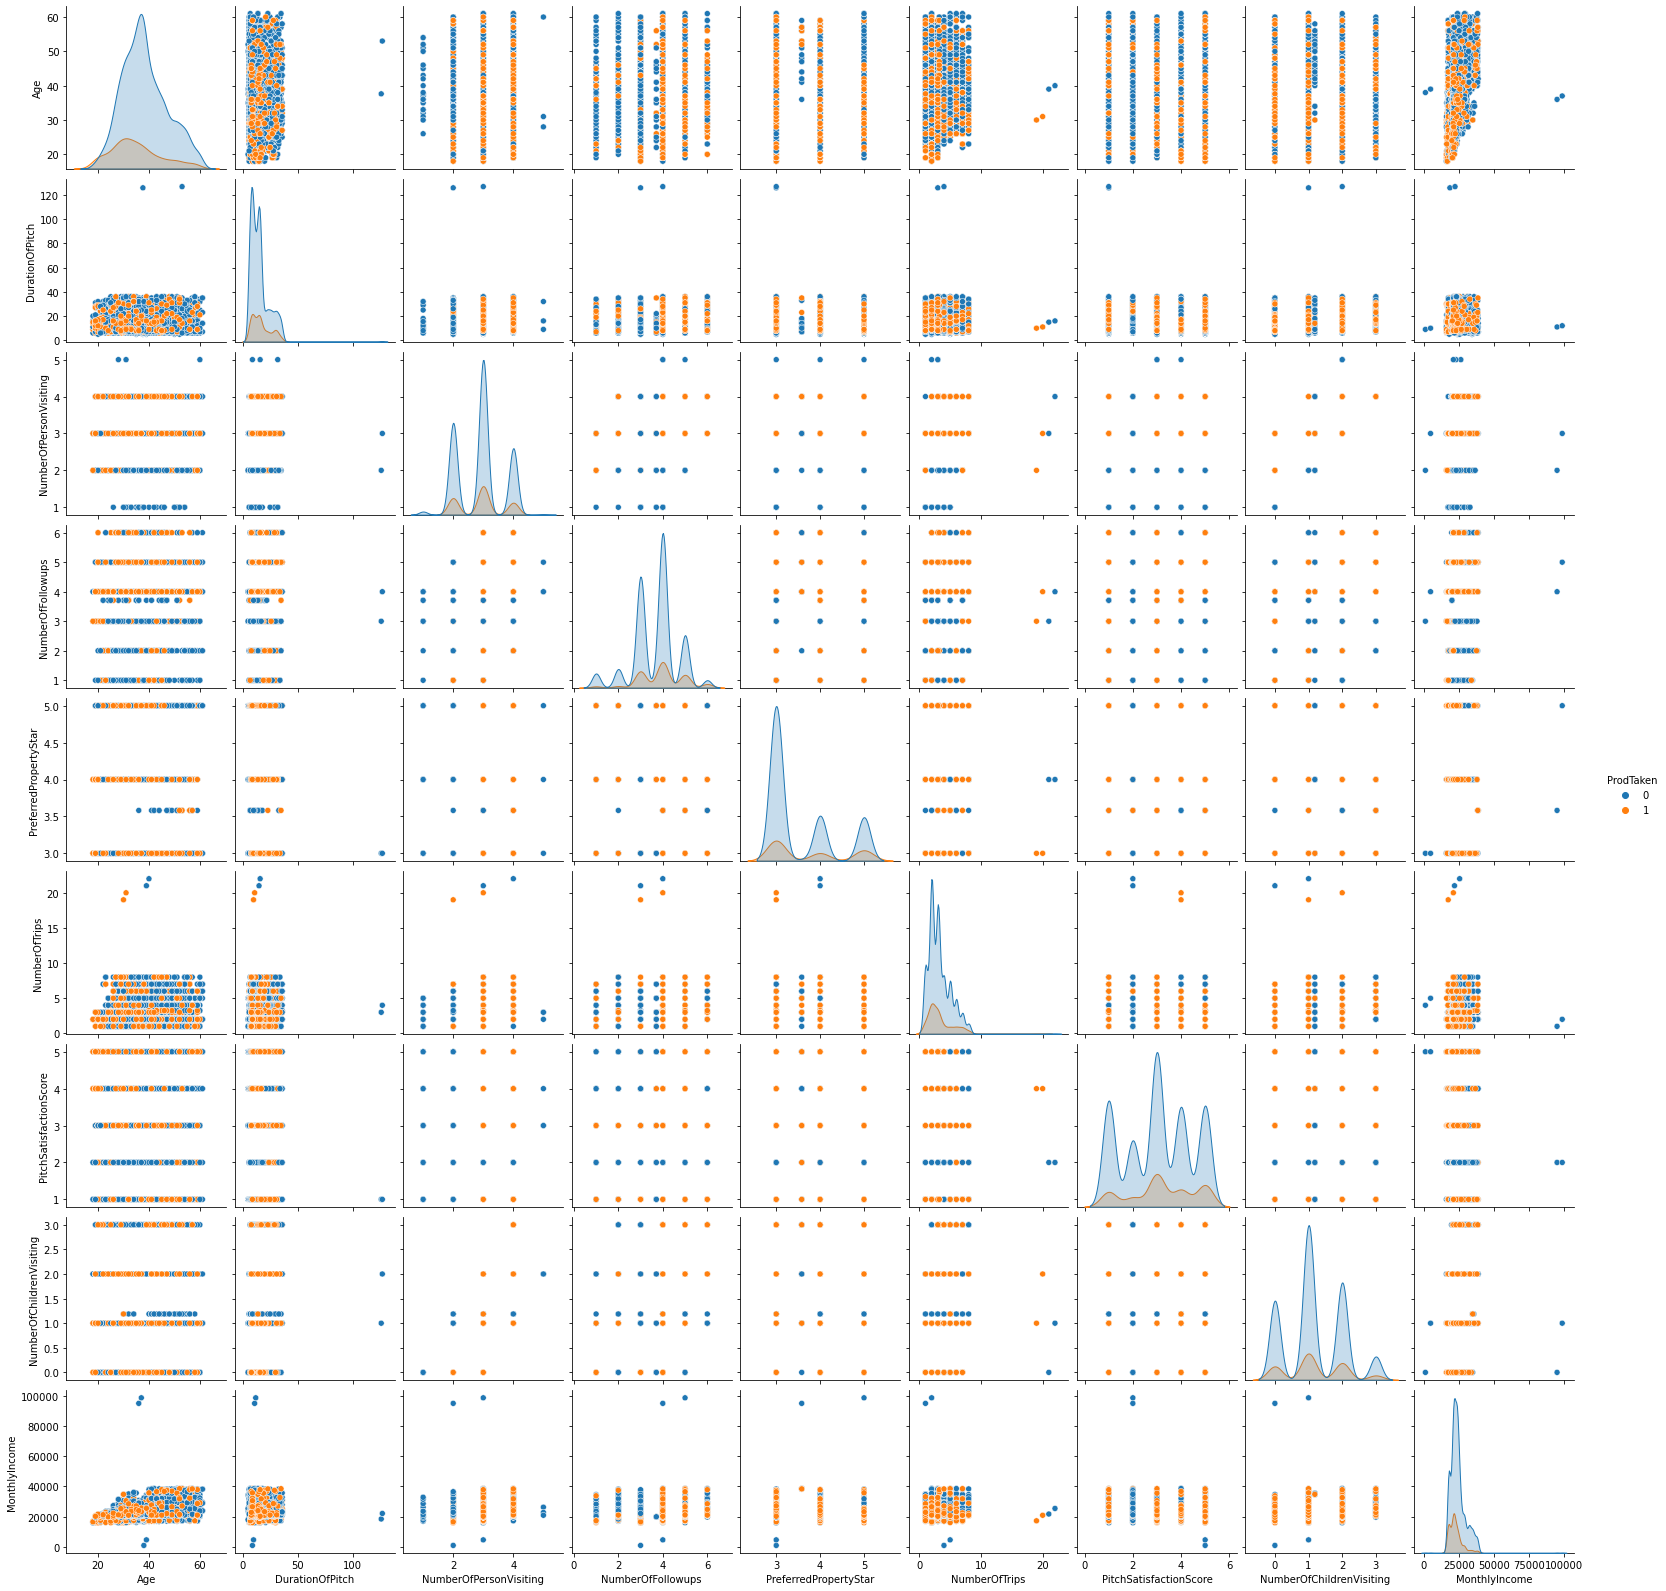

In [23]:
sns.pairplot(
    data,
    x_vars= data.select_dtypes(include=['int64', 'float64']).columns.tolist(),
    y_vars= data.select_dtypes(include=['int64', 'float64']).columns.tolist(),
    hue='ProdTaken'
)

* It doesn't look easy to interpret anything from the pairplot. Let's look at each graph individually

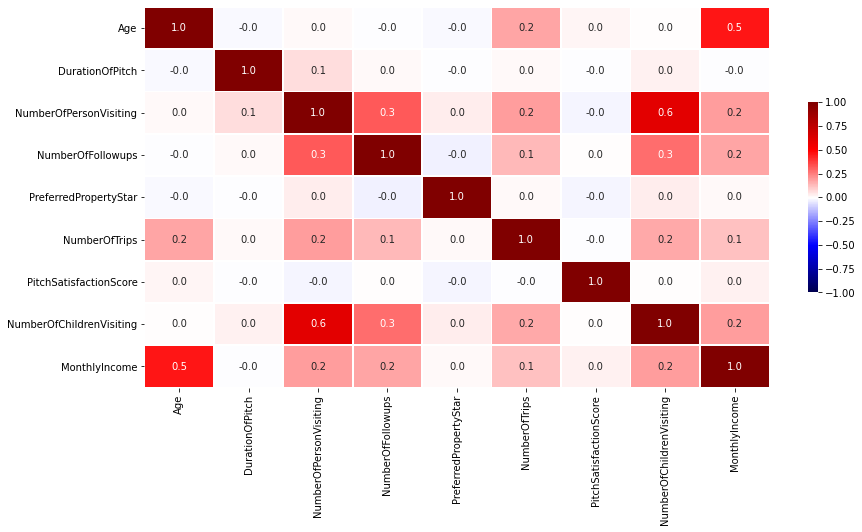

In [24]:
# Correlation
corr = data[numeric_col].corr()
fig, ax = plt.subplots(figsize=(14, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

__Observations__:

1. Age is positively correlated with monthly income. 
2. NumberOfPersonVisiting is positively correlated with NumberOfChildrenVisiting

* There are no variables of interest which are highly correlated. 

In [25]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


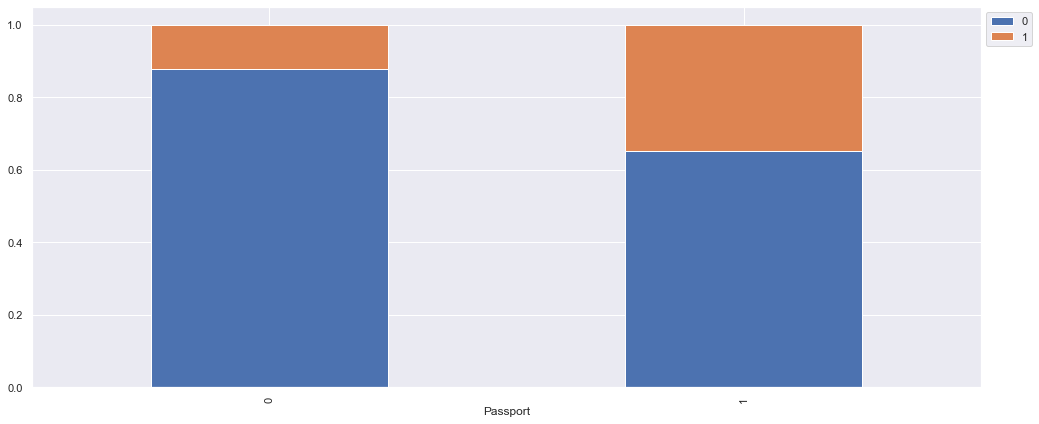

In [26]:
stacked_plot(data['Passport'])

* Customers with passport might prefer to buy a travel package

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


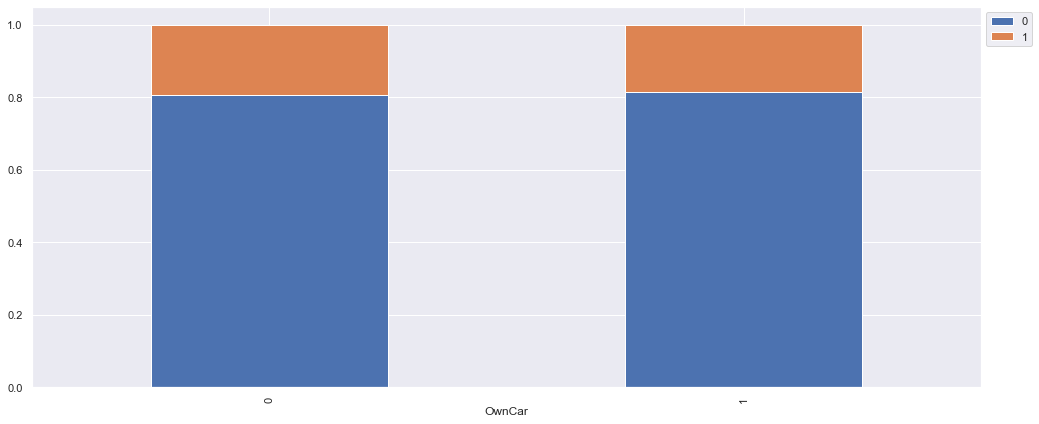

In [27]:
stacked_plot(data['OwnCar'])

* It doesn't look like there is any relation between whether a customer has a car and whether they buy a travel package

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


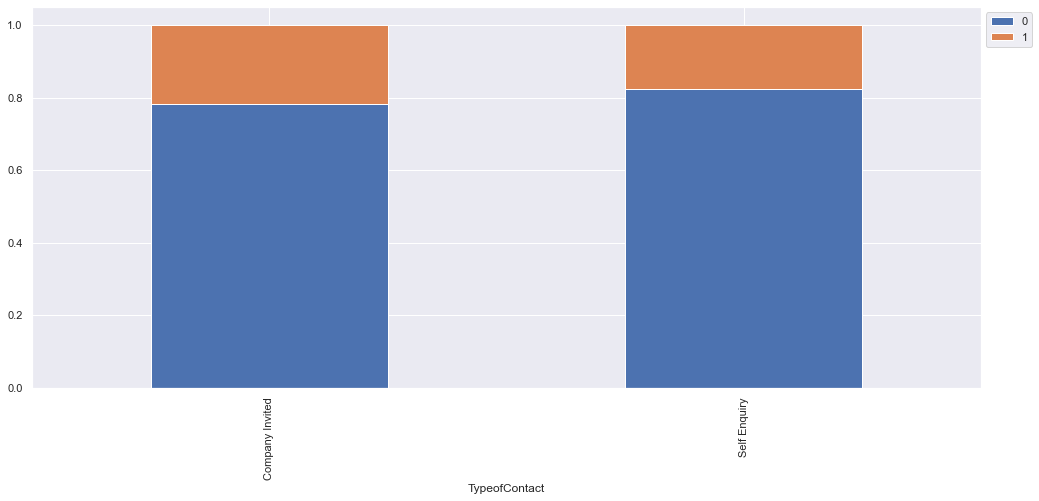

In [28]:
stacked_plot(data['TypeofContact'])

* It doesn't look like there is any relation between whether a customer was Company Invited or not and whether they buy a travel package

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


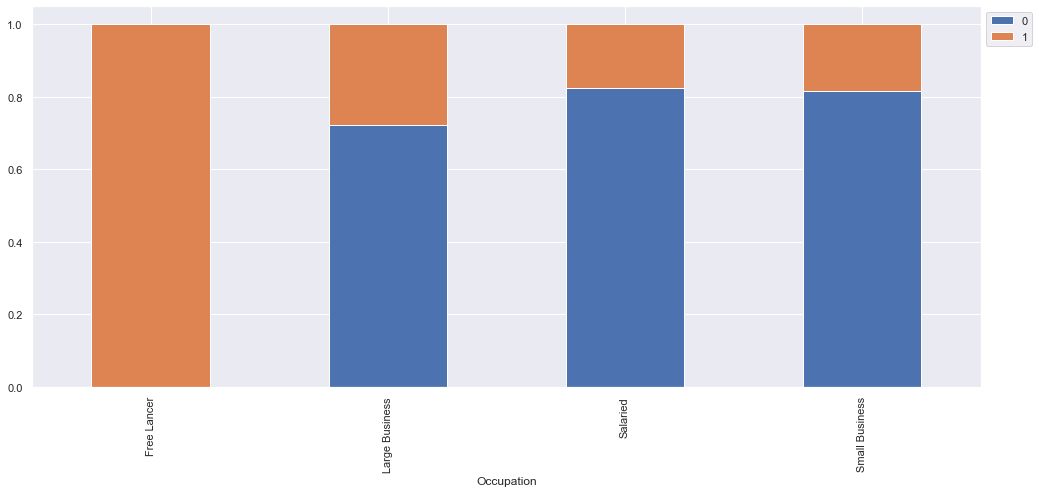

In [29]:
stacked_plot(data['Occupation'])

* Though the graph shows that all the free lancers bought a travel package, the number of examples of free lancers is 2, which is very low. We cannot conclude anything from this data
* It looks like customers with large business tend to buy travel packages more than salaried and small business but the number of examples of Large business is very low compared to salaried and small business. 

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


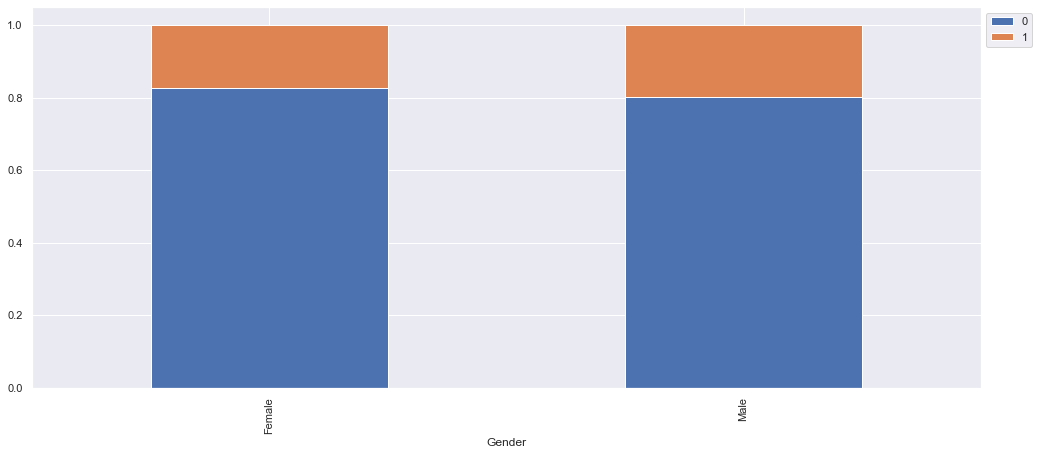

In [30]:
stacked_plot(data['Gender'])

* It doesn't look like there is any relation between customer gender and the probability of buying a travel package

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


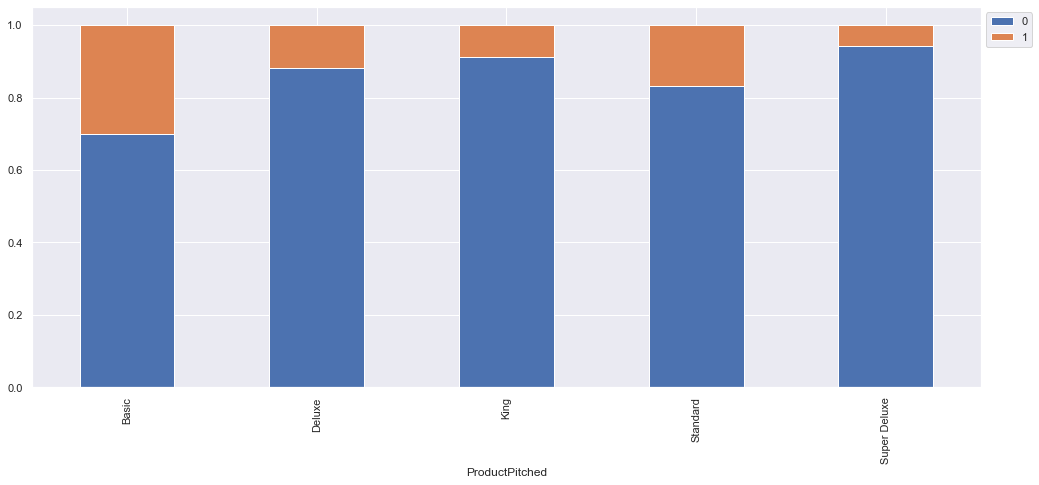

In [31]:
stacked_plot(data['ProductPitched'])

* We can clearly see that the customer bought a travel package when the product pitched is Basic

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


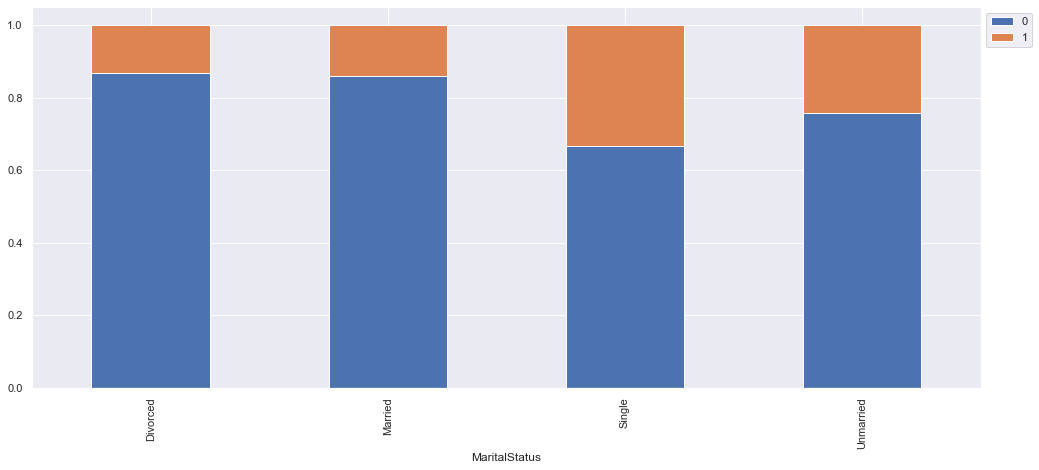

In [32]:
stacked_plot(data['MaritalStatus'])

1. Single people might prefer to buy travel packages more than the others.
2. Even unmarried people bought travel packages more than Divorced or Married people

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


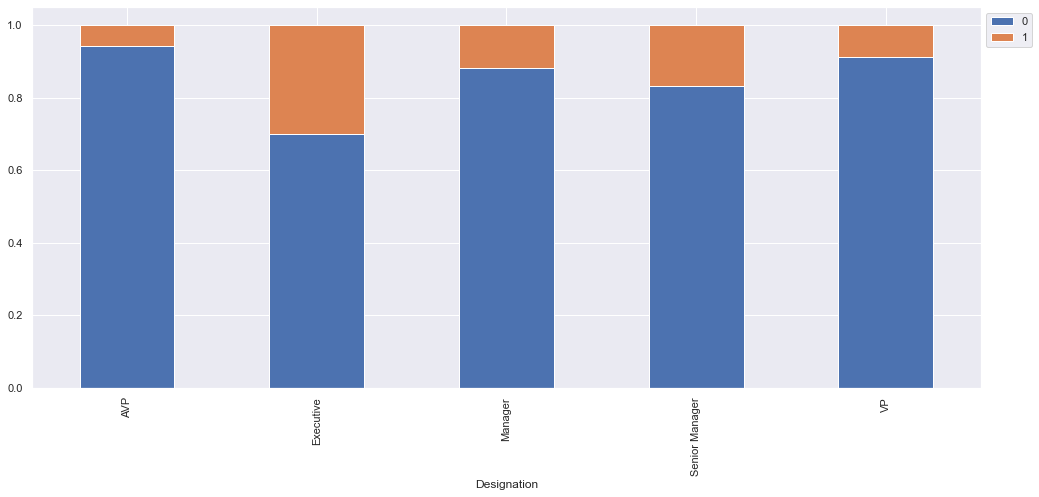

In [33]:
stacked_plot(data['Designation'])

* There is clearly higher probability for executives buying the travel product

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


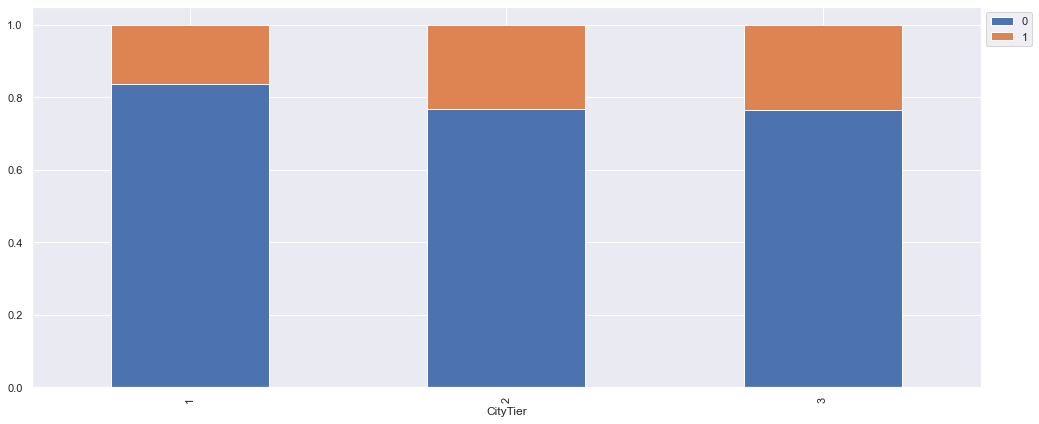

In [34]:
stacked_plot(data['CityTier'])

* The probability of Tier 2 and Tier 3 city customers buying the travel package is slightly higher than that of tier 1 but it's not a clear conclusion because most of the data points are Tier 1

In [35]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of people who refused travel package')
    sns.distplot(data[(data[target] == '0')][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title("Distribution of people who bought travel package")
    sns.distplot(data[(data[target] == '1')][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t ProdTaken')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t ProdTaken - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow') #turning off outliers from boxplot
    plt.tight_layout()
    plt.show()

In [36]:
data['ProdTaken'] = data['ProdTaken'].astype('str')

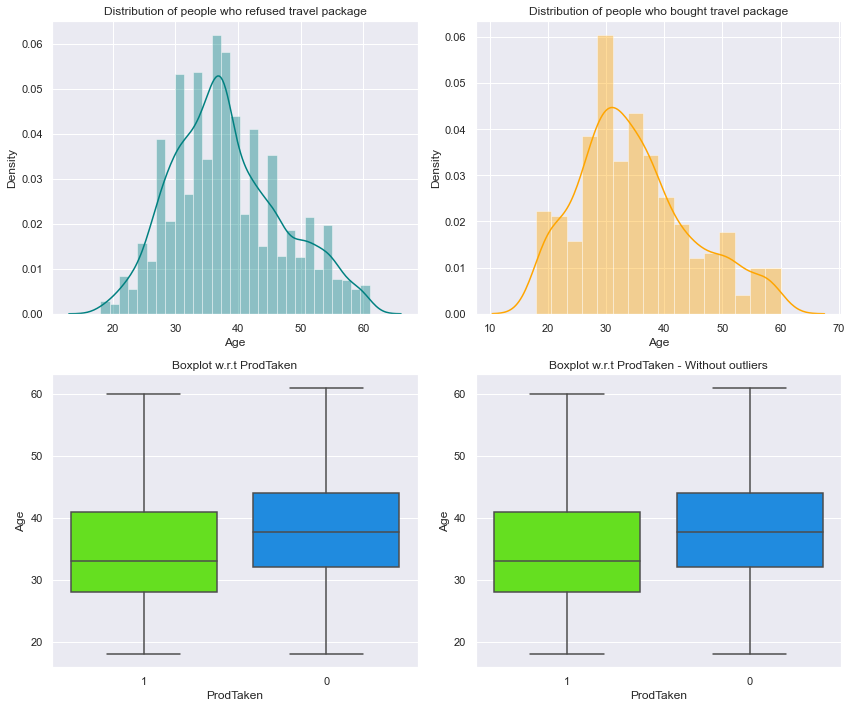

In [37]:
plot('Age')

* Distribution of Age of people is normally distributed.

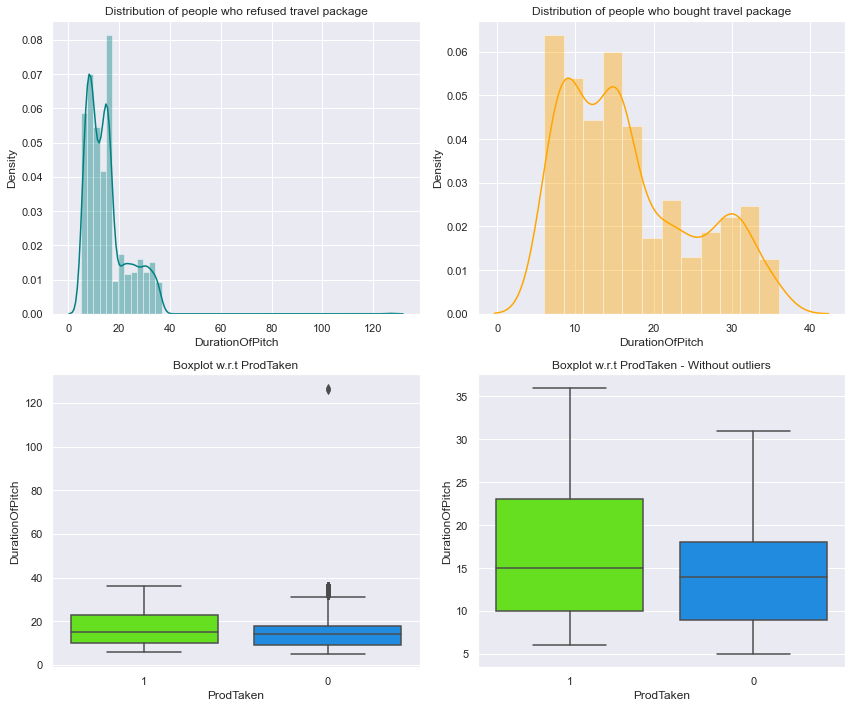

In [39]:
plot('DurationOfPitch')

* Duration of Pitch is higher for people who bought the travel package

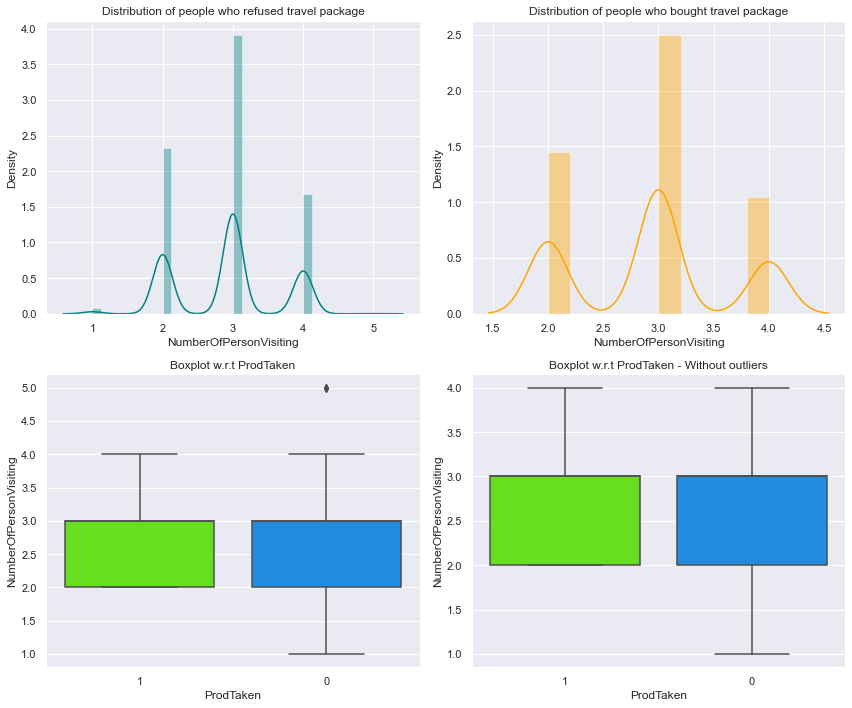

In [40]:
plot('NumberOfPersonVisiting')

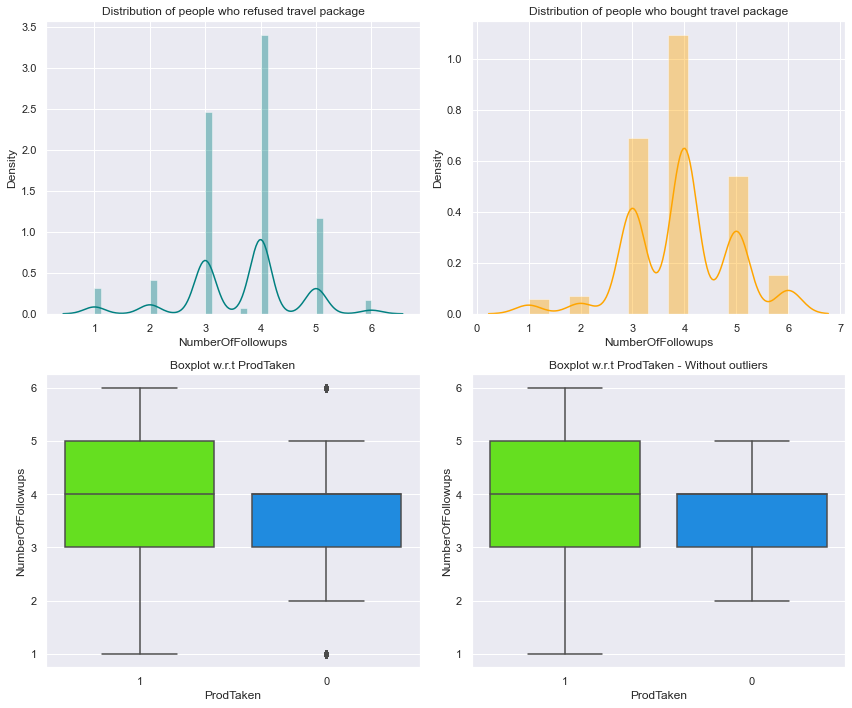

In [41]:
plot('NumberOfFollowups')

* It seems that people bought the package if more number of followups are done

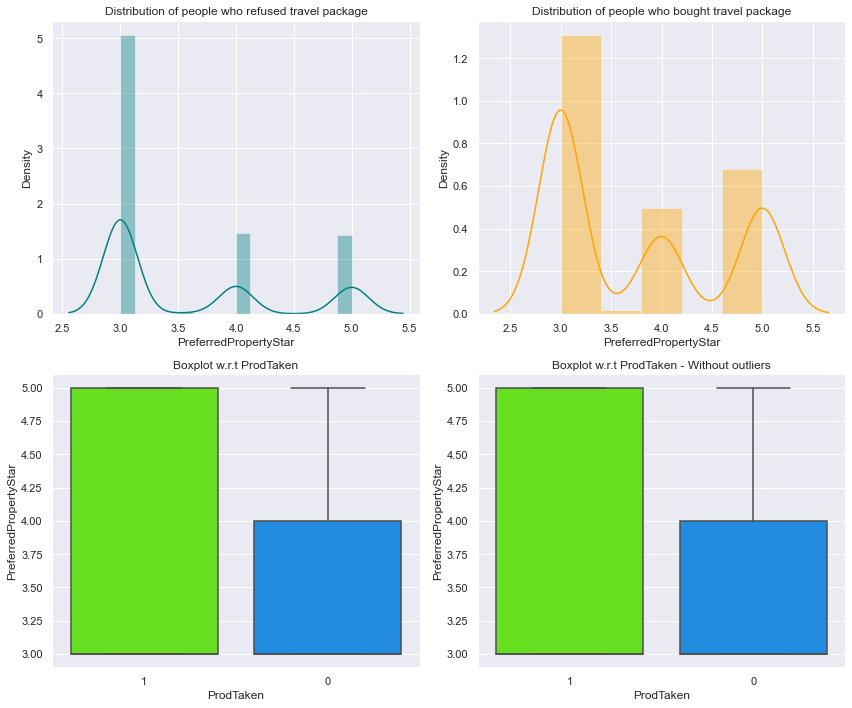

In [42]:
plot('PreferredPropertyStar')

* 3 is the preferred property star in the entire dataset

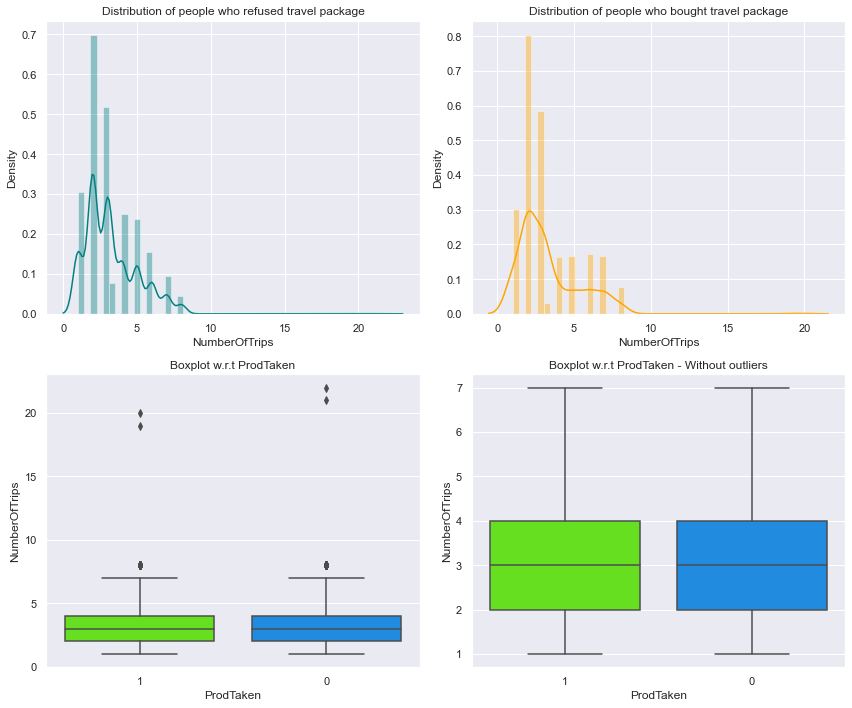

In [43]:
plot('NumberOfTrips')

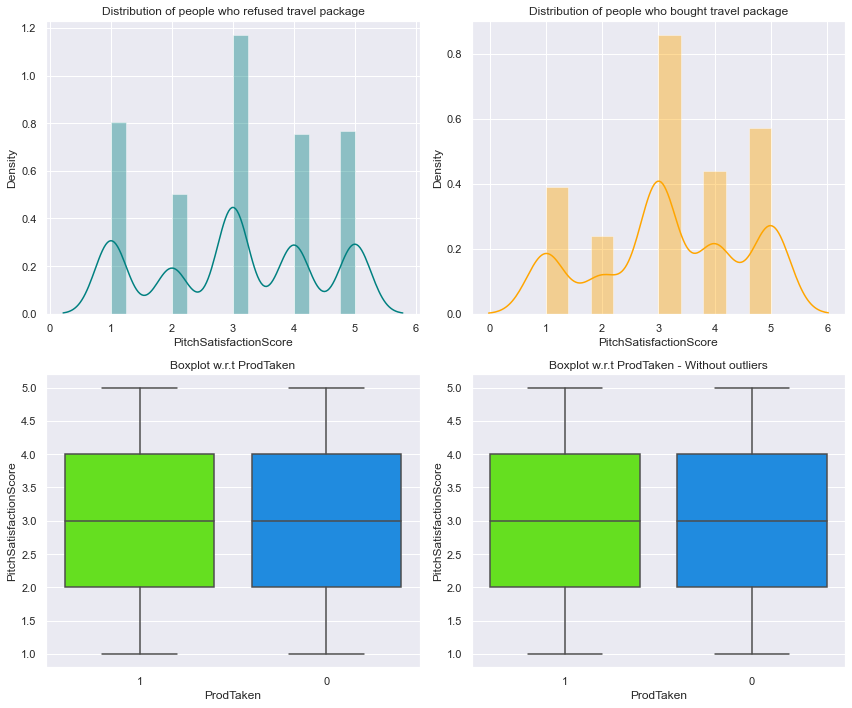

In [44]:
plot('PitchSatisfactionScore')

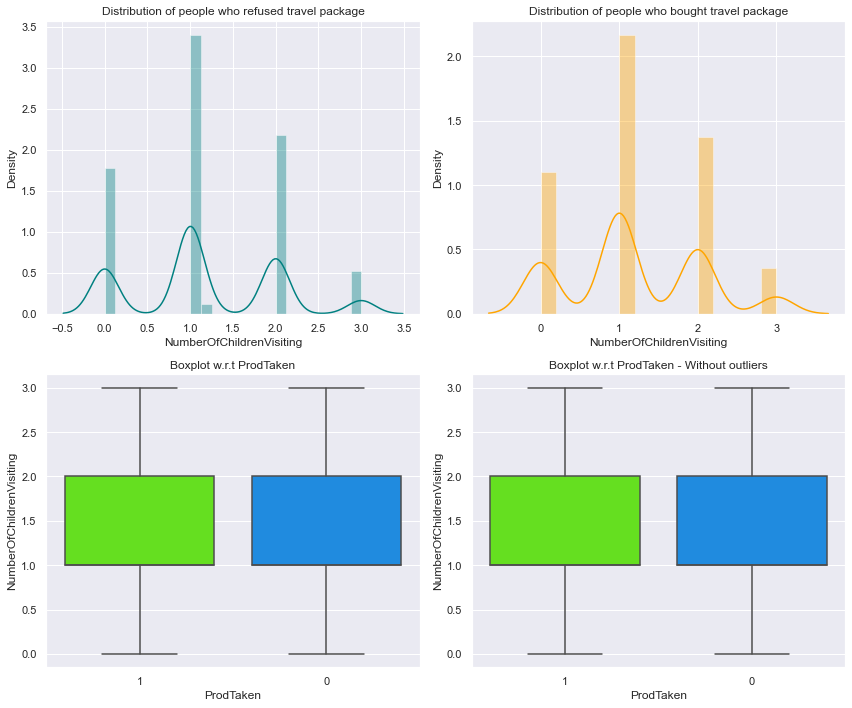

In [45]:
plot('NumberOfChildrenVisiting')

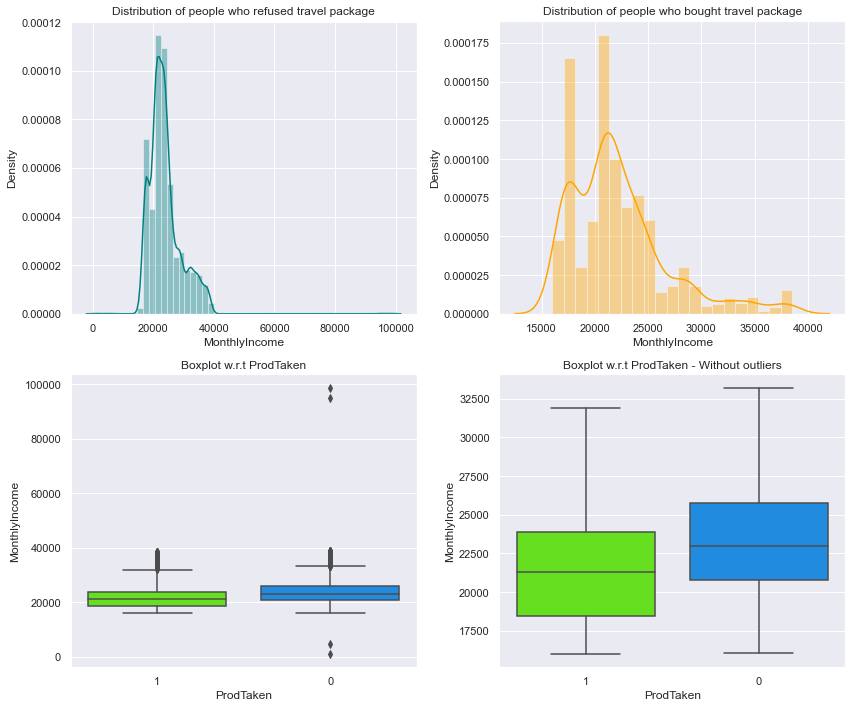

In [46]:
plot('MonthlyIncome')

* People with lower to mid range income levels have actually preferred the travel package

#### Outlier detection

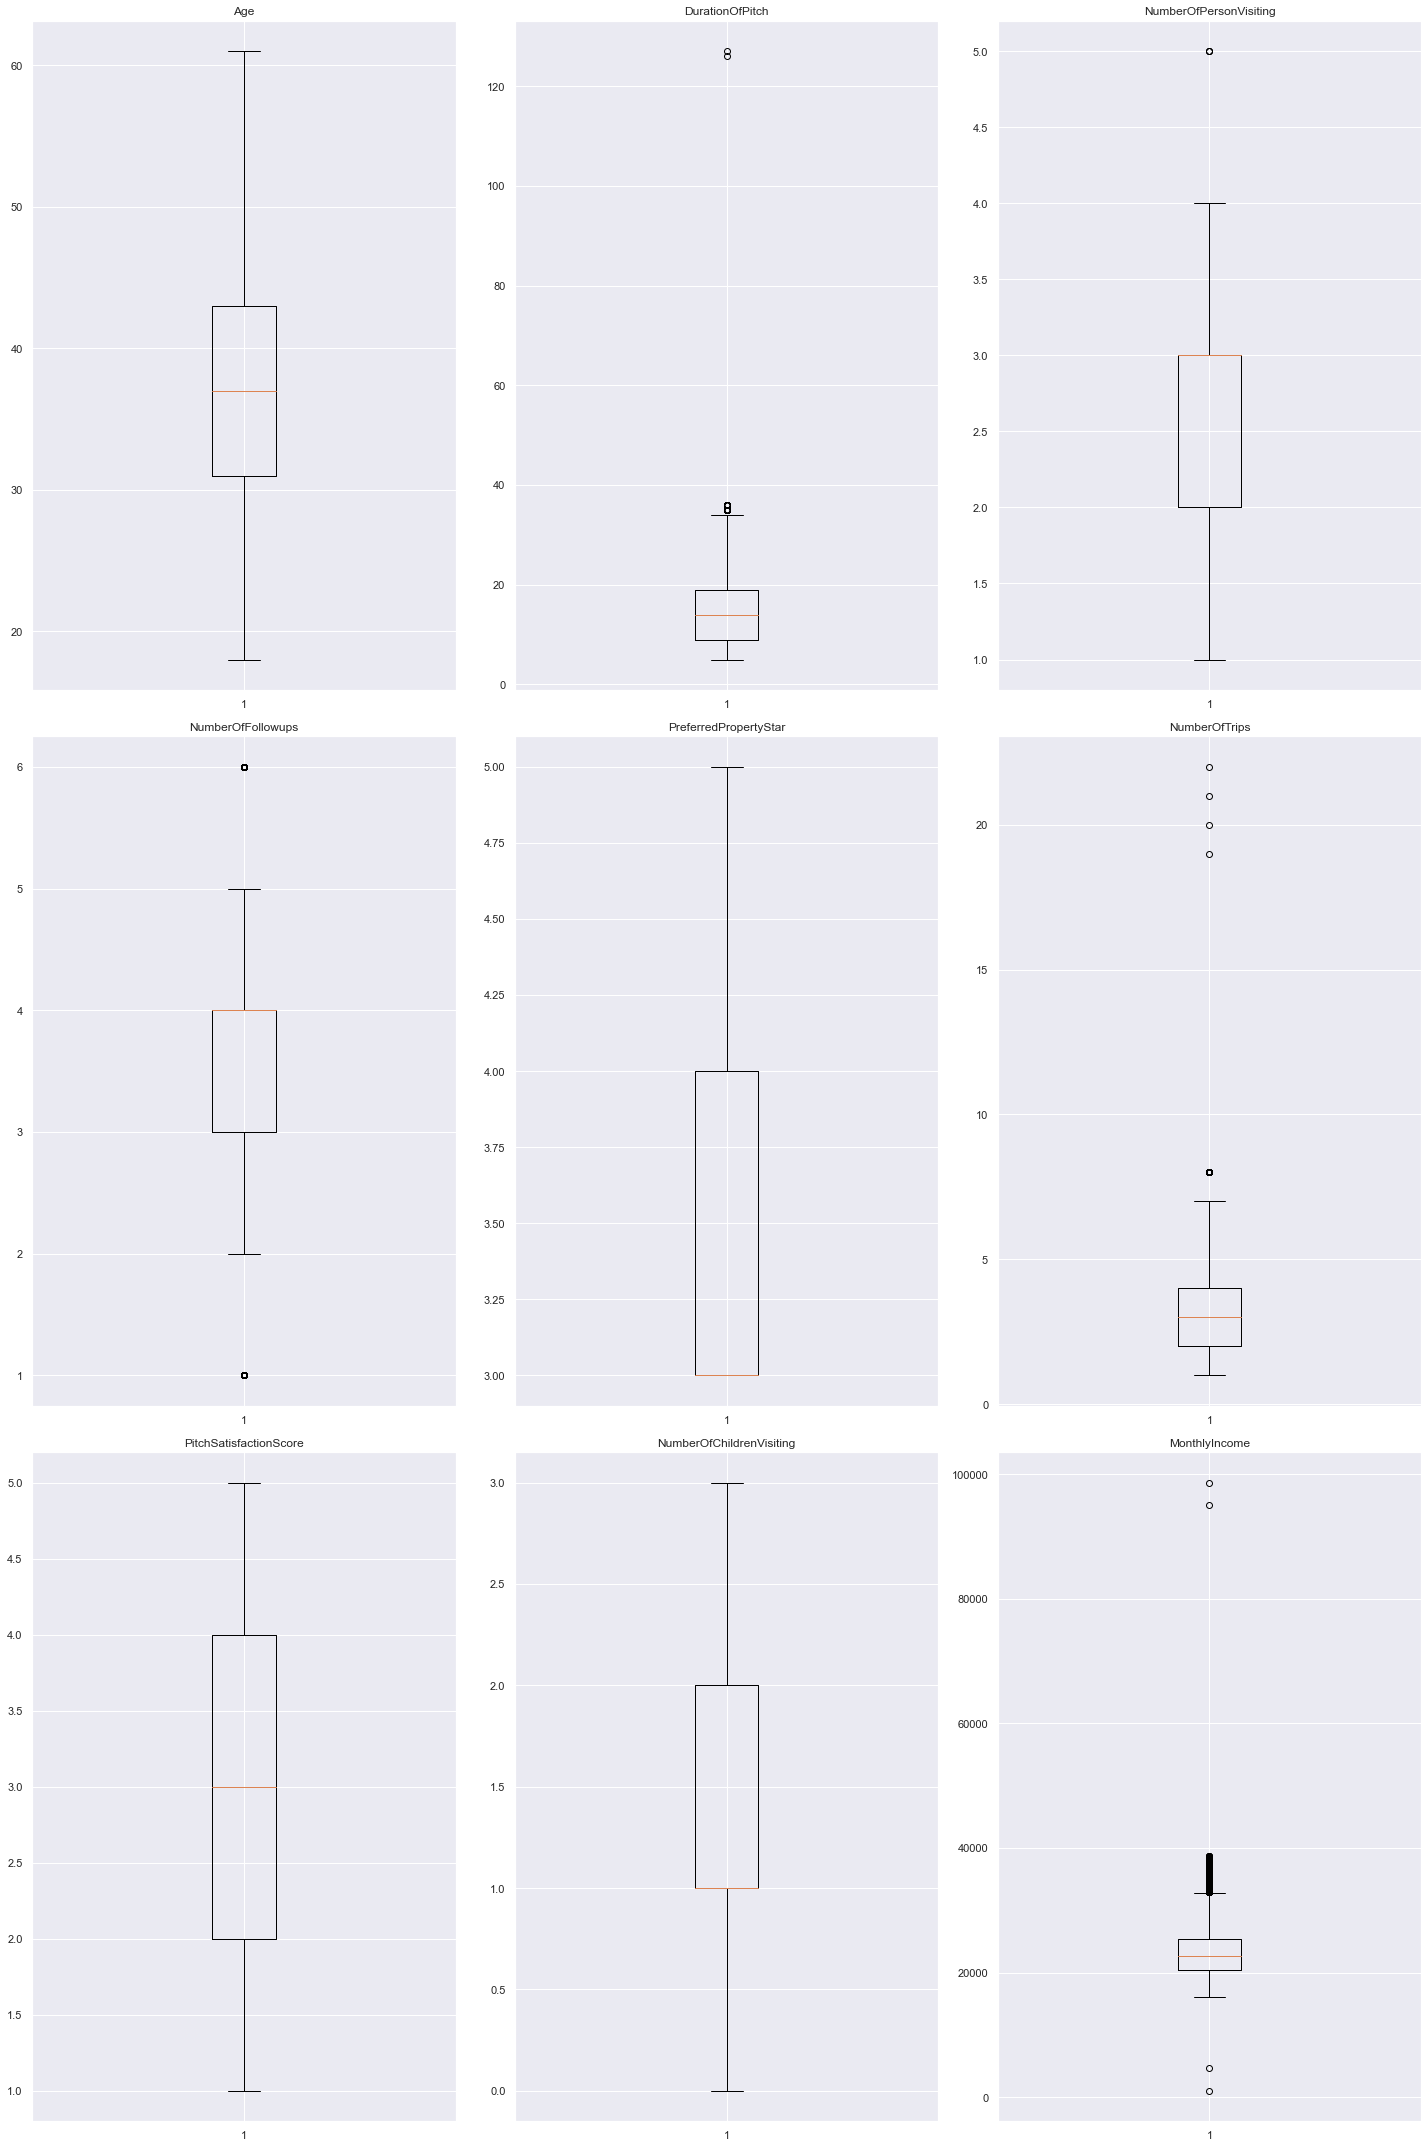

In [47]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(3,3,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* DurationOfPitch, NumberOftrips, NumberOfpersonsVisiting have upper outliers.
* NumberOfFollowups and MonthlyIncome have upper and lower outliers

#### Outliers need not be treated since decision trees are robust to outliers

#### Data Preparation for model building

In [48]:
# Library to split data
from sklearn.model_selection import train_test_split
data['ProdTaken'] = data['ProdTaken'].apply(lambda x: 1 if x=='1' else 0)
data = pd.get_dummies(data,drop_first=True)

# using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)
data = pd.DataFrame(data=data_norm, columns=data.columns)

X = data.drop(['ProdTaken'], axis=1)
Y = data['ProdTaken']

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [83]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [84]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [85]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [50]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [51]:
y_train.value_counts()

0.0    2797
1.0     624
Name: ProdTaken, dtype: int64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a user will buy the travel package and the user doesn't
2. Predicting a user won't be interested in buying a travel package but he is interested

### Which case is more important? 
* Predicting a user won't be interested in buying a travel package but he is interested. This results in losing a customer.  
* However, note that we also don't want to waste a lot of resources by reaching out to every single customer. We need to observe the precision too and reject the model if the precision is too low.

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can maximize the profit by selling the travel package to potential buyers. We need to observe the precision too so as to not waste many resources and reject the model if the precision is too low



In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#### Decision tree

In [57]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=1)

In [58]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

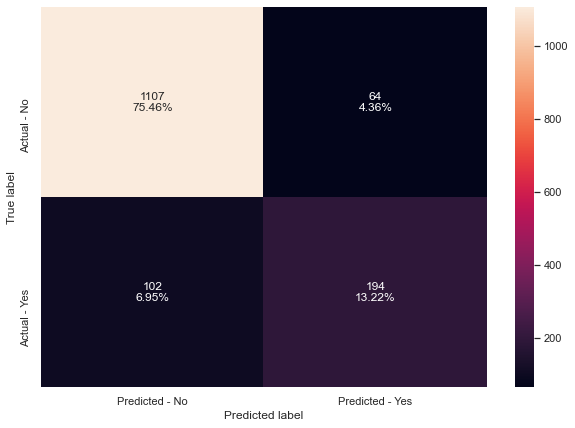

In [59]:
make_confusion_matrix(dtree,y_test)

In [86]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8868438991138378
Recall on training set :  1.0
Recall on test set :  0.6554054054054054
Precision on training set :  1.0
Precision on test set :  0.751937984496124


* We can clearly see this is overfitting. Test recall is 0.65 which is not a great one

#### Bagging

In [166]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

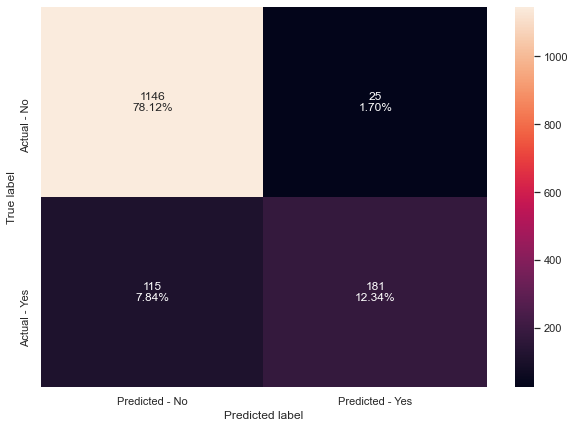

In [167]:

make_confusion_matrix(bagging,y_test)

In [292]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)

Accuracy on training set :  0.9935691318327974
Accuracy on test set :  0.9045671438309475
Recall on training set :  0.9663461538461539
Recall on test set :  0.6114864864864865
Precision on training set :  0.9983443708609272
Precision on test set :  0.8786407766990292


* Performance was not better than decision tree. We see low recall. We see overfitting. Let's try class_weight="balanced" to account for class imbalance in the data

In [64]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  random_state=1)

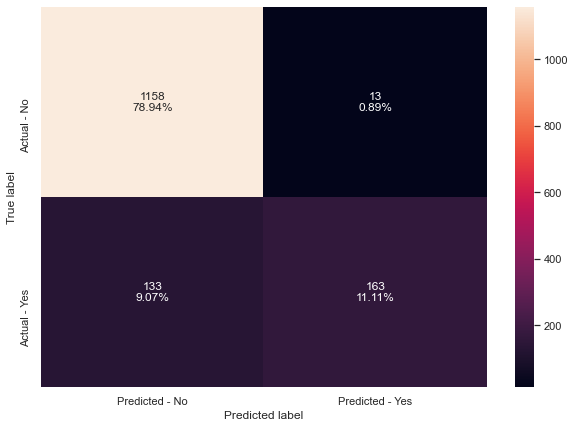

In [65]:

make_confusion_matrix(bagging_wt,y_test)

In [293]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)

Accuracy on training set :  0.9935691318327974
Accuracy on test set :  0.9004771642808452
Recall on training set :  0.9647435897435898
Recall on test set :  0.5506756756756757
Precision on training set :  1.0
Precision on test set :  0.9261363636363636


* By using class_weight parameter, I expected the recall to improve but it became worse. The recall is decreased to 0.55
* We can also see the model is still overfitting

#### Random Forest

In [173]:

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [174]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9066121336059987
Recall on training set :  1.0
Recall on test set :  0.5675675675675675
Precision on training set :  1.0
Precision on test set :  0.9491525423728814


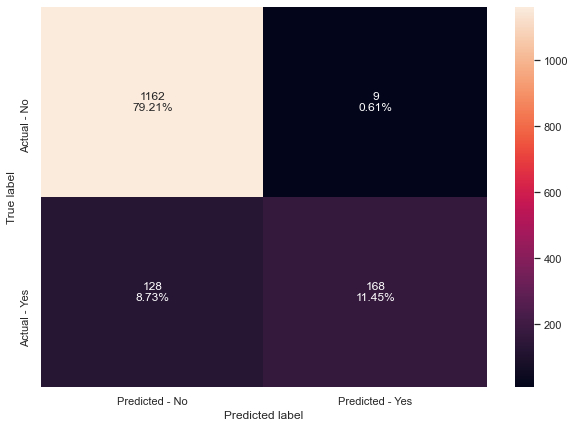

In [95]:

make_confusion_matrix(rf,y_test)

* Performance of random forest seems bad with a recall of 0.56. Let's try to tune the parameters with GridSearch
* We can also see the model is overfitting

### Using GridSearch for Hyperparameter tuning model

In [70]:
from sklearn.model_selection import GridSearchCV

In [176]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,20), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1],
              'class_weight': ['balanced', None]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, random_state=1)

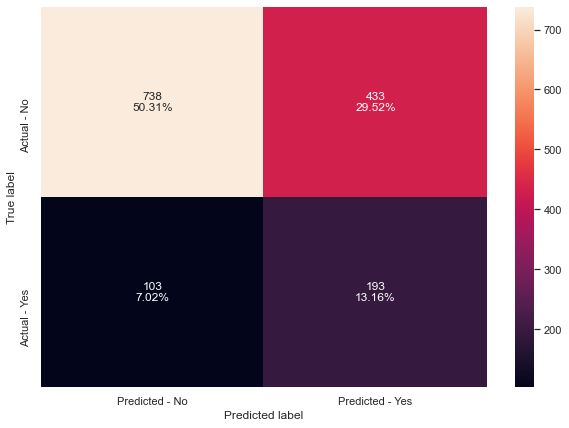

In [177]:
make_confusion_matrix(dtree_estimator,y_test)

In [178]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)

Accuracy on training set :  0.6556562408652441
Accuracy on test set :  0.634628493524199
Recall on training set :  0.7035256410256411
Recall on test set :  0.652027027027027
Precision on training set :  0.30656424581005587
Precision on test set :  0.3083067092651757


* Doing grid search on decision tree reduced the overfitting.
* Though the recall on test set is not improved, this model is a much generalized model
* Noting that the precision is not satisfactory. It is 0.30 on both train and test sets

#### Grid search for bagging classifier

In [183]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight='balanced',random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.3,0.5,0.7,0.9,1],
              'bootstrap_features': [True, False]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight='balanced',
                                                                   random_state=1)],
                         'bootstrap_features': [True, False],
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [187]:
## getting the best estimator
bagging_tuned  = grid.best_estimator_
bagging_tuned.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  max_features=1, n_estimators=15, random_state=1)

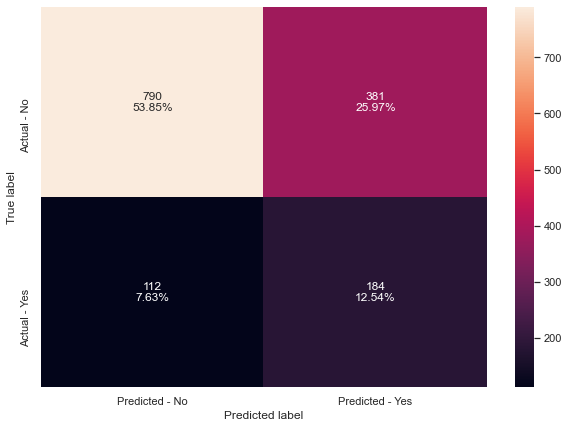

In [188]:
make_confusion_matrix(bagging_estimator,y_test)

In [189]:
tuned_bagging_acc= get_accuracy_score(bagging_tuned)
tuned_bagging_recall = get_recall_score(bagging_tuned)
tuned_bagging_precision = get_precision_score(bagging_tuned)

Accuracy on training set :  0.6875182695118387
Accuracy on test set :  0.6639400136332652
Recall on training set :  0.6987179487179487
Recall on test set :  0.6216216216216216
Precision on training set :  0.3310554290053151
Precision on test set :  0.3256637168141593


* Recall has increased from 0.55 to 0.62 on the test set
* We can also see there is no overfitting which resulted in a generalized model
* Precision is still not great

#### Grid search for RandomForest

In [275]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,300,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,'log2','auto', 0.3],
        "max_samples": [0.7,0.9,None],
        "max_depth": [3,5,7,9],
        "class_weight": ['balanced', None, 'balanced_subsample']
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       max_features='log2', max_samples=0.9, min_samples_leaf=4,
                       n_estimators=110, random_state=1)

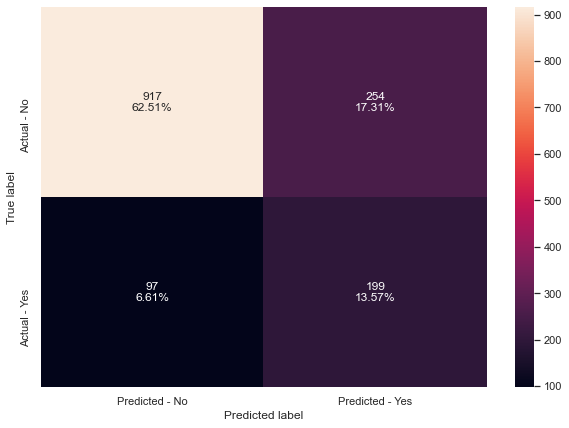

In [282]:
make_confusion_matrix(rf_tuned,y_test)

In [283]:
tuned_rf_acc = get_accuracy_score(rf_tuned)
tuned_rf_recall = get_recall_score(rf_tuned)
tuned_rf_precision = get_precision_score(rf_tuned)

Accuracy on training set :  0.7515346389944461
Accuracy on test set :  0.7607361963190185
Recall on training set :  0.7419871794871795
Recall on test set :  0.6722972972972973
Precision on training set :  0.4019097222222222
Precision on test set :  0.4392935982339956


* Recall has improved significantly from 0.56 to 0.67
* We see that the model is not overfitting as before
* We see an increase in recall but loss in precision

In [294]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_tuned,rf,rf_tuned]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [295]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.886844,1.000000,0.655405,1.000000,0.751938
1,Tuned Decision Tree,0.655656,0.634628,0.703526,0.652027,0.306564,0.308307
2,Bagging Classifier,0.993569,0.904567,0.966346,0.611486,0.998344,0.878641
3,Weighted Bagging Classifier,0.993569,0.900477,0.964744,0.550676,1.000000,0.926136
4,Tuned Bagging Classifier,0.687518,0.663940,0.698718,0.621622,0.331055,0.325664
5,Random Forest,1.000000,0.906612,1.000000,0.567568,1.000000,0.949153
6,Tuned Random Forest,0.751535,0.760736,0.741987,0.672297,0.401910,0.439294


__Observations on bagging estimators__:

1. Tuned RandomForest is performing slightly better than the tuned BaggingClassifier
2. Both RandomForest and BaggingClassifier are not overfitting after hyper parameter tuning

In [296]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport_1                   0.265216
Designation_Executive        0.158437
MonthlyIncome                0.076005
Age                          0.075195
MaritalStatus_Single         0.068485
ProductPitched_Deluxe        0.052656
DurationOfPitch              0.039537
ProductPitched_Super Deluxe  0.037181
Designation_Manager          0.037073
NumberOfFollowups            0.035412
CityTier_3                   0.029246
PreferredPropertyStar        0.025104
MaritalStatus_Married        0.022192
PitchSatisfactionScore       0.014606
NumberOfTrips                0.013936
NumberOfPersonVisiting       0.007913
Occupation_Large Business    0.007520
ProductPitched_King          0.005557
MaritalStatus_Unmarried      0.005198
TypeofContact_Self Enquiry   0.004934
Designation_VP               0.003555
NumberOfChildrenVisiting     0.003238
ProductPitched_Standard      0.003184
Gender_Male                  0.002514
Occupation_Small Business    0.001829
Occupation_S

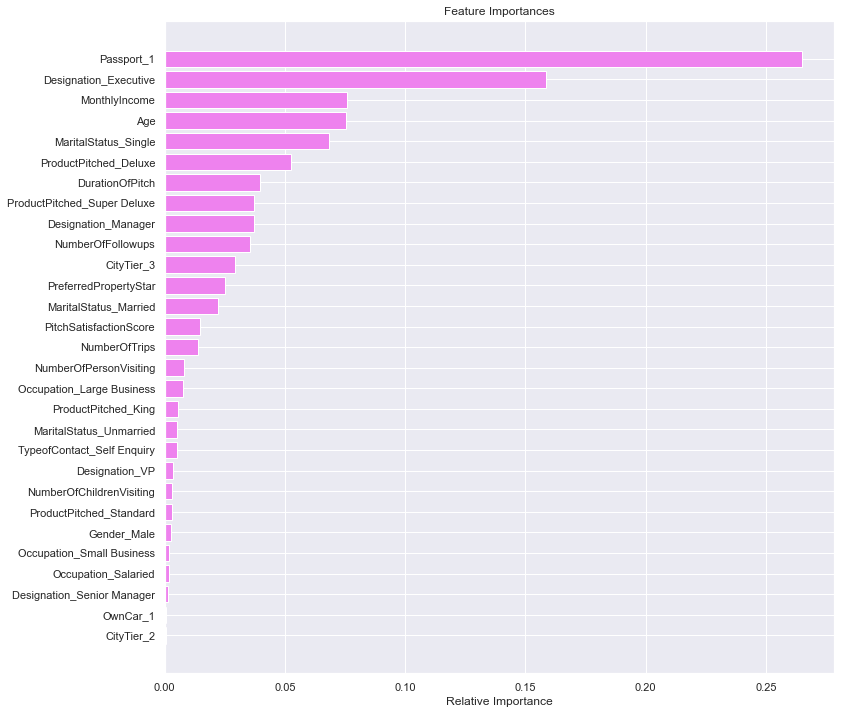

In [297]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

__Observations__:
1. The most important feature selected by RandomForest is whether the user has a passport or not
2. The next important feature  is whether the designation of the user is Executive

### Boosting techniques

In [102]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier

In [238]:
adb = AdaBoostClassifier(random_state=1)

In [239]:
adb.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [240]:
adb_acc = get_accuracy_score(adb)
adb_recall = get_recall_score(adb)
adb_precision = get_precision_score(adb)

Accuracy on training set :  0.8491669102601579
Accuracy on test set :  0.8336741649625086
Recall on training set :  0.34615384615384615
Recall on test set :  0.2939189189189189
Precision on training set :  0.6666666666666666
Precision on test set :  0.7131147540983607


* Recall is very less on both training and testing set which shows that the model is underfitting

#### GridSearch on AdaboostClassifier

In [259]:
# Tune using GridSearch

# This is tuned decision tree from the previous section
experimental_base_estimator = DecisionTreeClassifier(class_weight='balanced',
                                                                   max_depth=2,
                                                                   max_leaf_nodes=5,
                                                                   min_impurity_decrease=0.0001,
                                                                   random_state=1)
adb_tuned = AdaBoostClassifier(random_state=1)
parameters = {'learning_rate':[1, 0.5, 0.1, 0.01, 0.001],
              'base_estimator': [None, experimental_base_estimator],
              'n_estimators':np.arange(10,150,20),
             }
adb_grid = GridSearchCV(estimator=adb_tuned, param_grid=parameters, scoring='recall', cv=5)
adb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'base_estimator': [None,
                                            DecisionTreeClassifier(class_weight='balanced',
                                                                   max_depth=2,
                                                                   max_leaf_nodes=5,
                                                                   min_impurity_decrease=0.0001,
                                                                   random_state=1)],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130])},
             scoring='recall')

In [260]:
adb_tuned = adb_grid.best_estimator_
adb_tuned

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=2,
                                                         max_leaf_nodes=5,
                                                         min_impurity_decrease=0.0001,
                                                         random_state=1),
                   learning_rate=0.5, random_state=1)

In [261]:
adb_tuned_acc = get_accuracy_score(adb_tuned)
adb_tuned_recall = get_recall_score(adb_tuned)
adb_tuned_precision = get_precision_score(adb_tuned)

Accuracy on training set :  0.8208126278865828
Accuracy on test set :  0.8023176550783913
Recall on training set :  0.8141025641025641
Recall on test set :  0.722972972972973
Precision on training set :  0.5054726368159204
Precision on test set :  0.5071090047393365


* Recall has greatly improved with hyper parameter tuning in both train and test sets
* We can also see that it is not highly overfitting
* We are getting good results if we use the tuned decision tree as a base_estimator
* Precision is also satisfactory compared to bagging models

In [263]:
# importance of features in the tree building

print(pd.DataFrame(adb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.185758
Age                          0.173052
DurationOfPitch              0.075498
NumberOfFollowups            0.066666
Passport_1                   0.063218
NumberOfTrips                0.055975
PreferredPropertyStar        0.038290
MaritalStatus_Unmarried      0.037562
CityTier_3                   0.032807
Gender_Male                  0.032078
TypeofContact_Self Enquiry   0.029274
ProductPitched_Super Deluxe  0.021300
PitchSatisfactionScore       0.021210
Designation_Executive        0.020660
NumberOfPersonVisiting       0.020408
MaritalStatus_Single         0.020339
MaritalStatus_Married        0.019514
ProductPitched_Deluxe        0.018573
Occupation_Large Business    0.018480
Designation_Senior Manager   0.016017
CityTier_2                   0.012702
Occupation_Small Business    0.008938
ProductPitched_Standard      0.006092
Designation_VP               0.004062
Occupation_Salaried          0.001527
ProductPitch

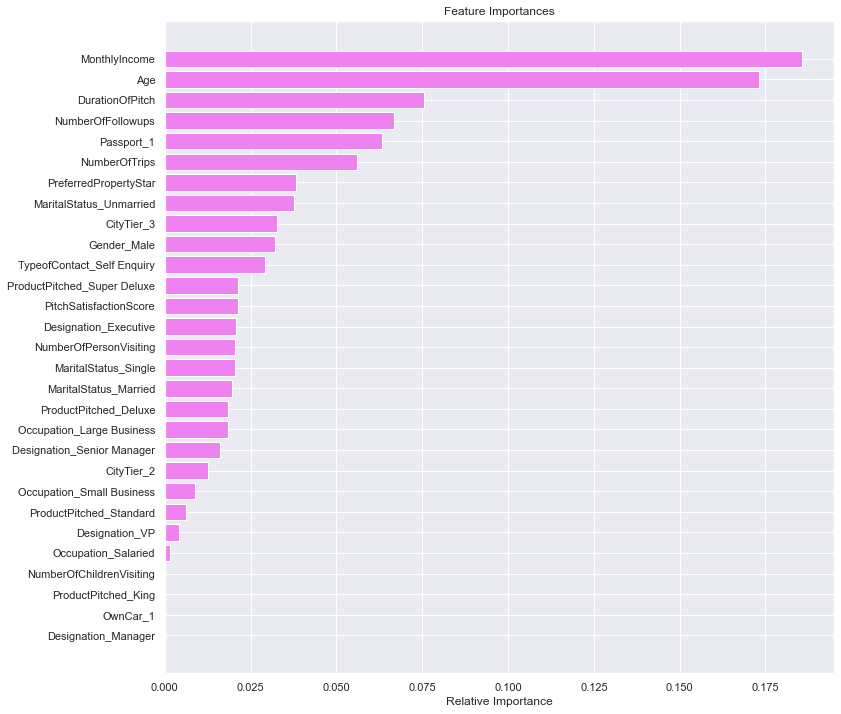

In [264]:
feature_names = X_train.columns
importances = adb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

__Observations__:

1. As opposed to RandomForest, Adaboost seclected monthly income as the most important feature
2. Age is the second most important feature

#### Gradient Boosting

In [265]:
gb=GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [266]:
gb_acc = get_accuracy_score(gb)
gb_recall = get_recall_score(gb)
gb_precision = get_precision_score(gb)

Accuracy on training set :  0.8906752411575563
Accuracy on test set :  0.8534423994546694
Recall on training set :  0.4807692307692308
Recall on test set :  0.3581081081081081
Precision on training set :  0.8571428571428571
Precision on test set :  0.8091603053435115


* Recall is not so great on both train and test set.
* We could say that the model is underfitting

In [268]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# This is tuned decision tree from the previous section
experimental_init_estimator = DecisionTreeClassifier(class_weight='balanced',
                                                                   max_depth=2,
                                                                   max_leaf_nodes=5,
                                                                   min_impurity_decrease=0.0001,
                                                                   random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,300,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features': [0.7,0.3,'log2','auto', None],
              'learning_rate': [1, 0.5, 0.1, 0.05],
              'init': [experimental_init_estimator, None],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=7, max_features='auto',
                           n_estimators=125, random_state=1, subsample=1)

In [270]:

gb_tuned_acc = get_accuracy_score(gb_tuned)
gb_tuned_recall = get_recall_score(gb_tuned)
gb_tuned_precision = get_precision_score(gb_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.934560327198364
Recall on training set :  1.0
Recall on test set :  0.7195945945945946
Precision on training set :  1.0
Precision on test set :  0.9424778761061947


* Performance has greatly improved with hyper parameter tuning in both train and test sets
* There is still some overfitting
* Precison is satisfactory with this model

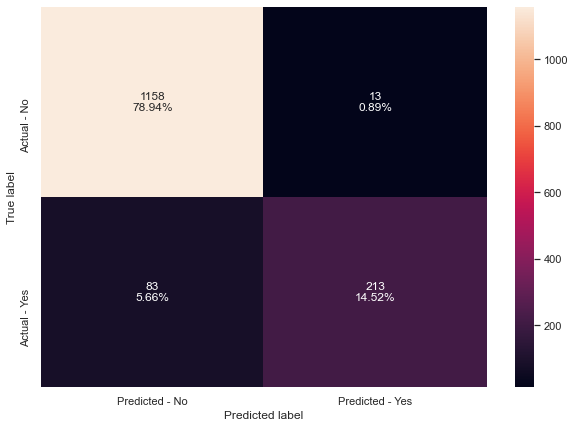

In [298]:
make_confusion_matrix(gb_tuned,y_test)

In [299]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.141505
DurationOfPitch              0.137199
Age                          0.128358
Passport_1                   0.091511
Designation_Executive        0.069573
PitchSatisfactionScore       0.058456
NumberOfFollowups            0.056895
PreferredPropertyStar        0.056392
NumberOfTrips                0.046197
CityTier_3                   0.036122
MaritalStatus_Single         0.024899
MaritalStatus_Married        0.018363
Gender_Male                  0.016213
TypeofContact_Self Enquiry   0.015774
Occupation_Large Business    0.012187
NumberOfPersonVisiting       0.011786
CityTier_2                   0.011303
Occupation_Small Business    0.010271
OwnCar_1                     0.009961
Occupation_Salaried          0.008973
MaritalStatus_Unmarried      0.008560
NumberOfChildrenVisiting     0.007797
Designation_Manager          0.006966
Designation_Senior Manager   0.006269
ProductPitched_Deluxe        0.003759
ProductPitch

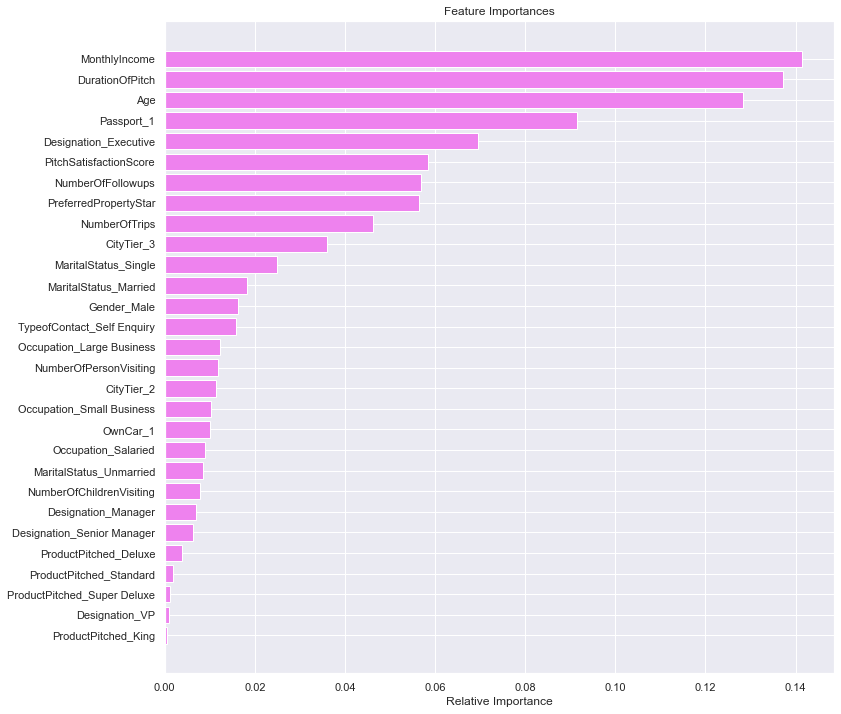

In [300]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Observations

1. Gradient boosting seclected monthly income as the most important feature
2. DurationOfPitch and Age are second and third most important features respectively
3. The feature importances are somewhat similar to Adaboost model

In [141]:
from xgboost import XGBClassifier

In [145]:
xgb_estimator=XGBClassifier(random_state=1, verbosity = 0)
xgb_estimator.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [146]:
xgb_acc = get_accuracy_score(xgb_estimator)
xgb_recall = get_recall_score(xgb_estimator)
xgb_precision = get_precision_score(xgb_estimator)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9222903885480572
Recall on training set :  0.9983974358974359
Recall on test set :  0.6790540540540541
Precision on training set :  1.0
Precision on test set :  0.9136363636363637


* The model is better in comparision to other models without any tuning
* We can see the model is overfitting

In [147]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, verbosity = 0)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [148]:

xgb_tuned_acc = get_accuracy_score(xgb_tuned)
xgb_tuned_recall = get_recall_score(xgb_tuned)
xgb_tuned_precision = get_precision_score(xgb_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9297886843899114
Recall on training set :  1.0
Recall on test set :  0.7162162162162162
Precision on training set :  1.0
Precision on test set :  0.9177489177489178


* It seems like the performance improved after hyper parameter tuning
* We are still seeing overfitting
* The model's performance is similar to gradient boosting or adaboost

In [149]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Designation_Executive        0.140673
Passport_1                   0.084314
MaritalStatus_Single         0.058299
ProductPitched_Standard      0.047088
MaritalStatus_Unmarried      0.046175
CityTier_3                   0.045883
Occupation_Large Business    0.044879
ProductPitched_Super Deluxe  0.040240
TypeofContact_Self Enquiry   0.038718
ProductPitched_King          0.038575
CityTier_2                   0.037545
NumberOfFollowups            0.034026
PitchSatisfactionScore       0.030992
Age                          0.030777
NumberOfTrips                0.029962
DurationOfPitch              0.028926
PreferredPropertyStar        0.028581
Gender_Male                  0.027043
MonthlyIncome                0.023079
Occupation_Small Business    0.023050
MaritalStatus_Married        0.022106
Occupation_Salaried          0.020814
NumberOfChildrenVisiting     0.020300
ProductPitched_Deluxe        0.020169
OwnCar_1                     0.019980
NumberOfPers

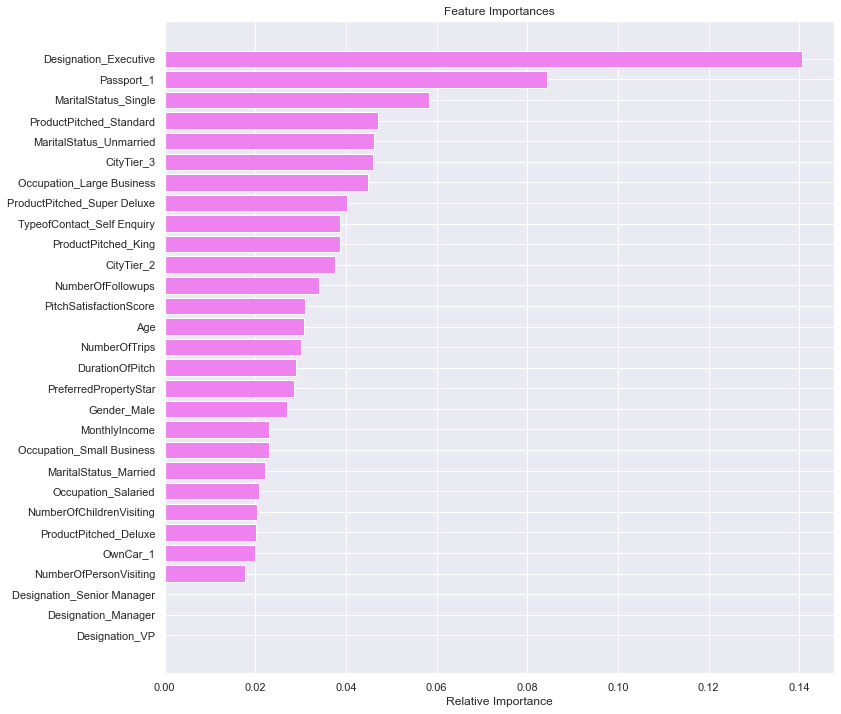

In [150]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 __Observations__

1. The most important feature selected by xgboost is whether the designation of the user is Executive
2. The next most important feature selected by XGBoost is whether the user has a passport or not

## <a id = "link7"></a>Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [157]:
from sklearn.ensemble import StackingClassifier

In [289]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [290]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=2,
                                                       max_leaf_nodes=5,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=3,
                                                       max_features='log2',
                                                       max_samples=0.9,
                                                       min_samples_leaf=4,
                                                       n_estimators=110,
                                                      

In [291]:
stacking_acc = get_accuracy_score(stacking_estimator)
stacking_recall = get_recall_score(stacking_estimator)
stacking_precision = get_precision_score(stacking_estimator)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9175187457396047
Recall on training set :  1.0
Recall on test set :  0.6959459459459459
Precision on training set :  0.9984
Precision on test set :  0.869198312236287


__Observations__:

1. Model is overifitting
2. Performance is not better than boosting models

### Model comparision

In [301]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_tuned,rf,rf_tuned, adb, adb_tuned, gb, gb_tuned, xgb_estimator, xgb_tuned, stacking_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [303]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Tuned Random Forest', 'AdaboostClassifier',
                                          'Tuned AdbClassifier', 'GradientBoosting', 'Tuned GradientBoosting',
                                          'XGBoost', 'Tuned XGBoost', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.886844,1.000000,0.655405,1.000000,0.751938
1,Tuned Decision Tree,0.655656,0.634628,0.703526,0.652027,0.306564,0.308307
2,Bagging Classifier,0.993569,0.904567,0.966346,0.611486,0.998344,0.878641
3,Weighted Bagging Classifier,0.993569,0.900477,0.964744,0.550676,1.000000,0.926136
4,Tuned Bagging Classifier,0.687518,0.663940,0.698718,0.621622,0.331055,0.325664
5,Random Forest,1.000000,0.906612,1.000000,0.567568,1.000000,0.949153
6,Tuned Random Forest,0.751535,0.760736,0.741987,0.672297,0.401910,0.439294
7,AdaboostClassifier,0.849167,0.833674,0.346154,0.293919,0.666667,0.713115
8,Tuned AdbClassifier,0.820813,0.802318,0.814103,0.722973,0.505473,0.507109
9,GradientBoosting,0.890675,0.853442,0.480769,0.358108,0.857143,0.809160


__Observations on Model comparision__:

1. DecisionTree, BaggingClassifier, RandomForest, XGBoost models were overfitting initially. After the hyper parameter tuning, they don't seem to be overfitting
2. RandomForest performed slightly better than Bagging in terms of both precision and recall.
3. GradientBoosting seems to be performing slightly better than Adbaoost in terms of precision. 
4. Boosting models are definitely performing better compared to Bagging models in terms of both precision and recall.
5. Bagging models have lower precision rates compared to Boosting models
6. Stacking classifier doesn't seems to be any better than GradientBoosting.

* Overall, Tuned GradientBoosting model seems to be performing better than the other models

### Recommendations to the business

* It is recommended to target users holding a passport. During EDA, we saw that the users who had passport bought travel packages more than the users who had no passport. XGboost and RandomForest models selected Passport as one of the most important features. Other models also selected passport as one of the top features 
* It is recommended to target users whose designation is executive. During EDA, we observed this. XGboost and RandomForest models selected this as one of the most important features.
* Monthly income is also one of the top features selected by our models. People with lower to mid range income levels have actually preferred the travel package in the past.
